##Shampoo sales Time Series modelling using ARIMA
#Dataset Description-The dataset describes the monthly number of shampoo over a 3year period.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
df=pd.read_csv('shampoo_sales.csv')

In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


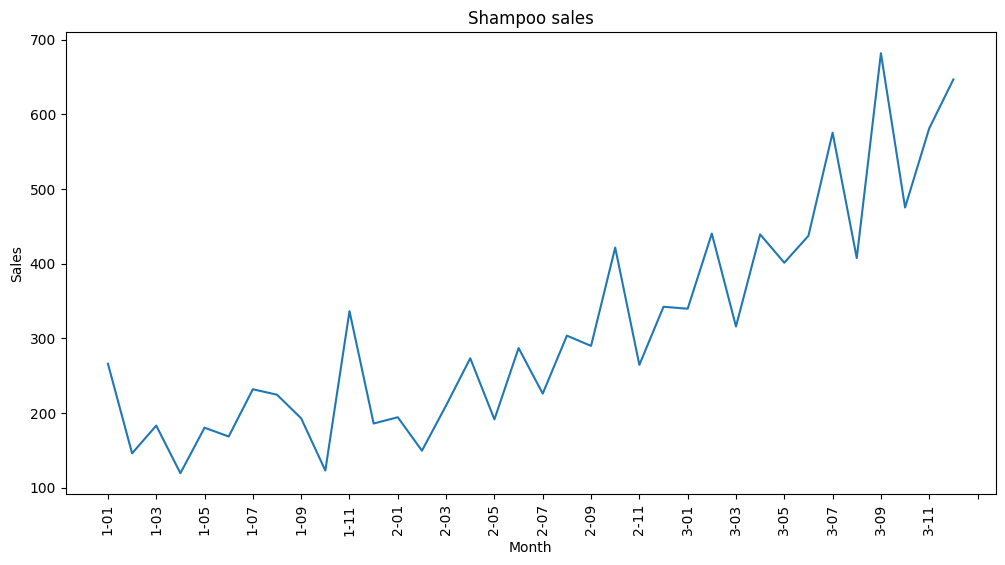

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Month'],df['Sales'])
#Graph Title

plt.title("Shampoo sales")
plt.xlabel('Month')
plt.ylabel('Sales')

#Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
#use MaxNlocator to reduce the number of xticks
from matplotlib.ticker import MaxNLocator
locator=MaxNLocator(nbins=20)
plt.gca().xaxis.set_major_locator(locator)

plt.show()

#Observations
The Shampoo sale dataset has a clear trend.This suggests that the tine serios is not stationary and will require differencing to make it stationary

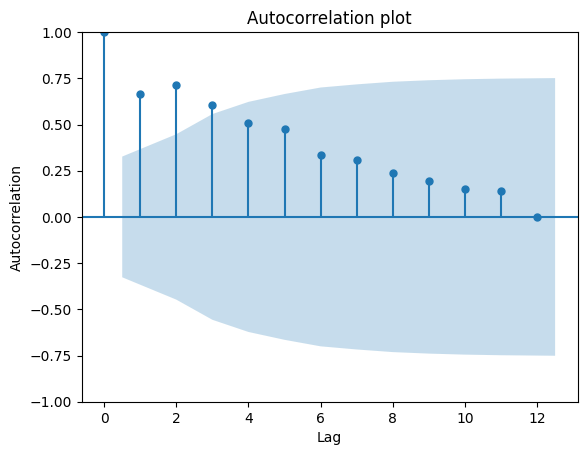

In [7]:
#Autocorrelation plot of the time series 
from statsmodels.graphics.tsaplots import plot_acf

#Set 'Date' as the index
#df.set_index_('Month',inplace=True)

#Calculate the ACF (via statsmodels)
plot_acf(df['Sales'],lags=12)

#show the plot
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation plot')
plt.show()

Explanation

    statsmodels.graphics.tsaplots.plot_acf: A function from statsmodels library for plotting the autocorrelation function.

    plot_acf function takes the 'Sales'column as input and calculates the autocorrelation values at different lags (up to 12 lags). It then plots these autocorrelation values using a barchart.

    ARIMA
Steps in building an ARIMA model

1.Visualize the time series and understand its characteristics.

2.Check for the stationary in the data.
Identify the order of differencing required to make the data stationary.

4.Plot the autocorrelation and partial autocorrelation functions to determine the orders of the AR and MA components.

5.Build the ARIMA model.

6.Evaluate the model's performance.


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# Step 1:Visualize the time series data

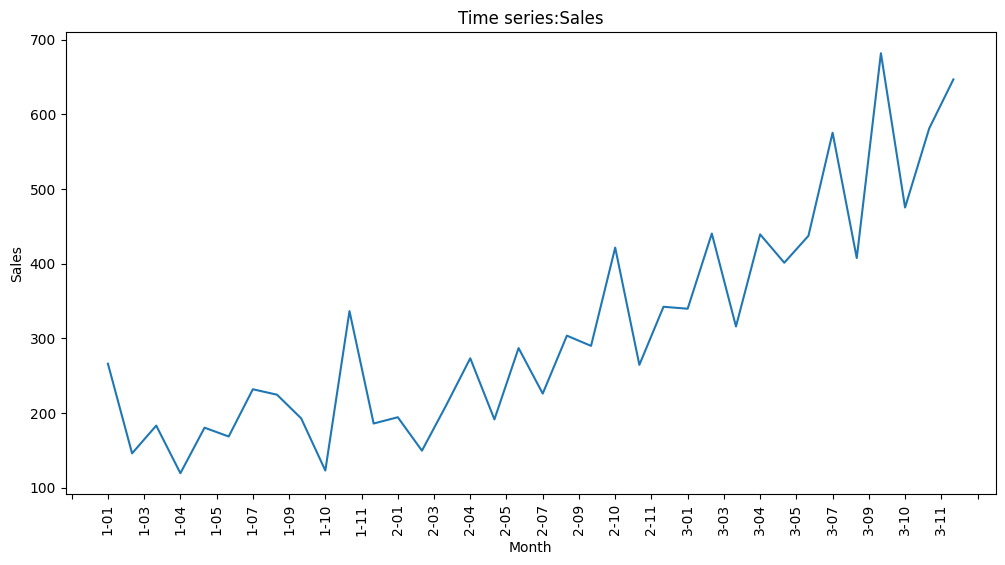

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Month'],df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time series:Sales')

#Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

#use MaxNlocator to reduce the number of xticks
from matplotlib.ticker import MaxNLocator
locator=MaxNLocator(nbins=30)
plt.gca().xaxis.set_major_locator(locator)

plt.show()


#step 2 & 3:Check for the stationary in the data

In [11]:
result=adfuller(df['Sales'])
print(f'ADF Statistic:{result[0]}')
print(f'p-value:{result[1]}')
print('Critical Value')
for key, value in result[4].items():
    print(f'{key} : {value}')

ADF Statistic:3.0601420836411815
p-value:1.0
Critical Value
1% : -3.7238633119999998
5% : -2.98648896
10% : -2.6328004


Explanation

We performed the Augmented Dickey-Fuller(ADF) test on the Sales column of the dataframe to check for stationarity.

    ADF Statistic : a numerical value that is part of the test.

    P-value : the probabilty of obtaining the ADF statistic assumming that the null hypothesis is true (the data is non-stationary). A lower p-value indicates stronger evidence against the null hypothesis, suggesting that the data is stationary.

    Critical Values : these are the test statistic values at different significance levels (1%, 5% and 10%).

The ADF statistic is compared with the critical values to determine the stationarity of the time series. If the ADF Statistic is less than the critical value at a certain significance level, we can reject the null hypothesis and conclude that the data is stationary at that level of significance.

If the p-value is less than the critical v   alues, it suggestts that the data is stationary, and differencing may not be necessary. Otherwise, differencingmay be required to make the data stationary before building an ARIMA model.

#Step 4: Plot the autocorrelation and partial autocorrelation functions to determine the orders of the AR and MA components.

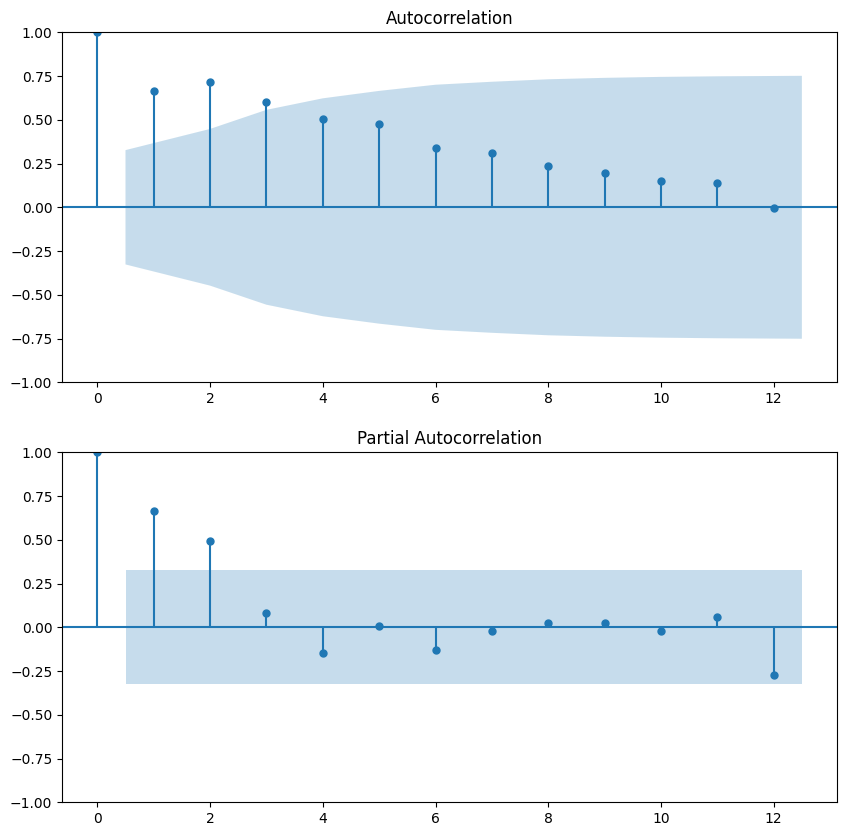

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plot_acf(df['Sales'],lags=12,ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Sales'],lags=12,ax=plt.gca())

plt.show()

Explanation

We plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function(PACF) for the Sales column of the dataframe. These plots are essential in identifying the orders of the Autoregressive (AR) and Moving Average(MA) components for the arima model.

    plt.subplot(211) : sets up a grid for two plots in a 2-row, 1 column configuration. The first plot (upper plot) will be the ACF plot.

    ax=plt.gca() : argument ensures that the plot is genereated in the current subplot.

    plt.subplot(212) : sets up the second plot in the 2-row, 1 column grid configuration.

#Step 5:ARIMA Model

In [14]:
order=(1,0,1) #(p,d,q)-adjust these values based on ACF & PACF
model=ARIMA(df['Sales'],order=order)
results=model.fit()

#Explanation

An ARIMA model is built using the 'Sales' column of the DataFrame (df['Sales']). The ARIMA model is specified with the order (p, d, q) set to (1, 0, 1).
The order variable represents the order of the ARIMA model where (p,d,f) specifies the numer of autoregressive(AR) terms, differences(d) and Moving Average(MA) terms respectively.

In [15]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Wed, 26 Jul 2023   AIC                            430.108
Time:                        14:23:23   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7012    234.967      1.586      0.113     -87.826     833.228
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.0

The summary provides a comprehensive overview of the model's performance and statistical measures.

    Coefficients: Estimated coefficients for the AR, MA, and constant terms in the ARIMA model.

    Standard Errors: Standard errors associated with the estimated coefficients.

    t-values: t-values (or z-values) for the coefficients, used to test the significance of each coefficient.

    P-values: P-values for the t-tests, indicating the statistical significance of each coefficient.

    Log-Likelihood: The log-likelihood value of the model, which helps assess the goodness-of-fit.

    AIC and BIC: Information criteria used to compare different models and select the best-fitting one.

    Ljung-Box (Q) statistic: A test for the absence of serial correlation in the model residuals.

    Durbin-Watson statistic: A test for autocorrelation in the residuals.

In [16]:
#forecast
forecast_steps=12
forecast=results.forecast(steps=forecast_steps)

print('Forecasted sales:')
print(forecast)

Forecasted sales:
36    576.150014
37    572.126186
38    568.181942
39    564.315708
40    560.525940
41    556.811127
42    553.169785
43    549.600463
44    546.101734
45    542.672204
46    539.310503
47    536.015291
Name: predicted_mean, dtype: float64


#Explanation

We perform a forecast using the ARIMA model(results) and print the forecasted values for the next 12 steps(months)

#DEFINITION OF TERMS

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion):
Information criteria for model selection in statistical modelling, including ARIMA models. They provide a way to balance model goodness-of-fit with model complexity, helping to identify the most appropriate model for a given dataset.

Ljung-Box (Q) statistic:
It is a test used in TSA to check for the presence of autocorrelation in the residuls of a fitted model. It is a common diagostic tool to assess whether a model adequately captures the serial correlation in the data.

Here's a more detailed explanation of the Ljung-Box Q statistic:

Residual Autocorrelation

After fitting a time series model (e.g., ARIMA, SARIMA), the residuals are obtained by subtracting the fitted values from the actual values in the dataset. The residuals represent the unexplained variability in the data after accounting for the model's fitted values.

Autocorrelation Function of Residuals

The autocorrelation function (ACF) of the residuals is computed to investigate whether there is any remaining serial correlation in the model's residuals. The ACF shows how each lag of the residuals is correlated with the previous lags.

Ljung-Box Test

The Ljung-Box Q statistic is a statistical test used to determine whether the autocorrelation coefficients in the ACF of the residuals are significantly different from zero. It helps assess whether the residuals are independently and identically distributed (IID) noise, which is a desirable property for a well-fitted model.

Hypotheses of the Test

Null Hypothesis (H0): The residuals are independently distributed (i.e., no autocorrelation).
Alternative Hypothesis (H1): The residuals exhibit autocorrelation up to a certain lag.

Interpreting the Test

If the calculated Q statistic exceeds the critical value at a chosen significance level (e.g., 0.05), we reject the null hypothesis of no autocorrelation. This indicates that the residuals do exhibit significant autocorrelation, suggesting that the model may not be capturing all the underlying patterns in the data. In such cases, further investigation and model refinement may be necessary.

Durbin-Watson statistic

The Durbin-Watson statistic is a test used in time series analysis and regression analysis to check for the presence of autocorrelation in the residuals of a model. It is particularly useful in linear regression models and time series models, such as ARIMA and SARIMA, where serial correlation can affect the reliability of the parameter estimates and predictions.

Here's a more detailed explanation of the Durbin-Watson statistic:

Residual Autocorrelation

After fitting a model (e.g., linear regression, ARIMA) to the data, the residuals are obtained by subtracting the fitted values from the actual values. The residuals represent the unexplained variability in the data after accounting for the model's predictions.

Autocorrelation of Residuals

The Durbin-Watson statistic assesses whether the residuals are autocorrelated, meaning that the residuals at one time point are correlated with the residuals at nearby time points (lags). Autocorrelation in residuals indicates that the model might not adequately capture the temporal patterns in the data.

Hypotheses of the Test

Null Hypothesis (H0): There is no first-order autocorrelation in the residuals (i.e., the residuals are uncorrelated).
Alternative Hypothesis (H1): There is first-order autocorrelation in the residuals.

Interpreting the Test

DW near 2: Indicates no first-order autocorrelation (residuals are uncorrelated).

DW < 2: Suggests positive autocorrelation (positive serial correlation) in the residuals.

DW > 2: Suggests negative autocorrelation (negative serial correlation) in the residuals.
